# Library

In [1]:
# Library to dataset
import os
import zipfile
import numpy as np
import pandas as pd

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Others
import shutil
import random

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score

# Dataset

In [2]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Vegetable Ripeness/Dataset/Tomato/train",
    label_mode="categorical",
    class_names= ['damaged','old','ripe','unripe'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Vegetable Ripeness/Dataset/Tomato/valid",
    label_mode="categorical",
    class_names= ['damaged','old','ripe','unripe'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=False,
    seed=123
)

==========================Training Data====================
Found 1626 files belonging to 4 classes.
==========================Validation Data====================
Found 355 files belonging to 4 classes.


In [3]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/256.)
test_datagen  = ImageDataGenerator(rescale = 1.0/256)

# --------------------
# Flow training images in batches of 1 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("Vegetable Ripeness/Dataset/Tomato/train",
                                                    batch_size=1,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("Vegetable Ripeness/Dataset/Tomato/valid",
                                                         batch_size=1,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224),
                                                         shuffle=False)

Found 1626 images belonging to 4 classes.
Found 355 images belonging to 4 classes.


# DenseNet 1

In [4]:
# Load model
DenseNet121_Model1 = tf.keras.models.load_model('Tomato_DenseNet_model')

In [5]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DenseNet121_Model1 = DenseNet121_Model1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DenseNet121_Model1[1]*100))
print("Loss: %.6f%%" % (scores_DenseNet121_Model1[0]*100))

==========================Evaluate Model====================
355/355 [==============================] - 13s 21ms/step - loss: 0.1631 - accuracy: 0.9690
Accuracy: 96.901411%
Loss: 16.311702%


==========================Confusion Matrix====================
355/355 [==============================] - 10s 23ms/step


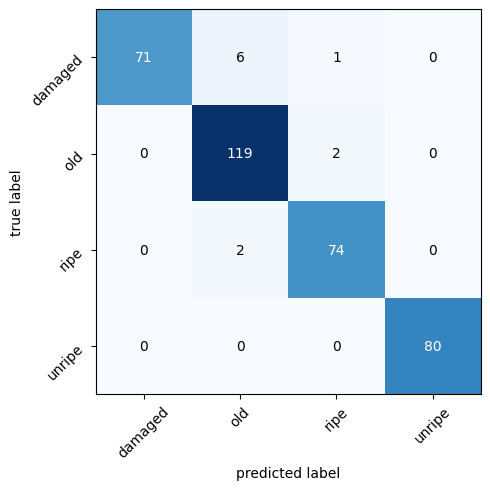

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      0.91      0.95        78
         old       0.94      0.98      0.96       121
        ripe       0.96      0.97      0.97        76
      unripe       1.00      1.00      1.00        80

    accuracy                           0.97       355
   macro avg       0.97      0.97      0.97       355
weighted avg       0.97      0.97      0.97       355

==========================F1 Score====================
F1 Score :  0.9700044537552338


In [6]:
# Confusion Matrix and Classification Report
target_names = ['damaged','old','ripe','unripe']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DenseNet121_Model1.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Tomato_DenseNet1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Tomato_DenseNet1)

# DenseNet 2

In [7]:
# load model
DenseNet121_Model2 = tf.keras.models.load_model('Tomato_DenseNet2_model')

In [8]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DenseNet121_Model2 = DenseNet121_Model2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DenseNet121_Model2[1]*100))
print("Loss: %.6f%%" % (scores_DenseNet121_Model2[0]*100))

==========================Evaluate Model====================
355/355 [==============================] - 10s 23ms/step - loss: 0.1356 - accuracy: 0.9775
Accuracy: 97.746480%
Loss: 13.558786%


==========================Confusion Matrix====================
355/355 [==============================] - 10s 24ms/step


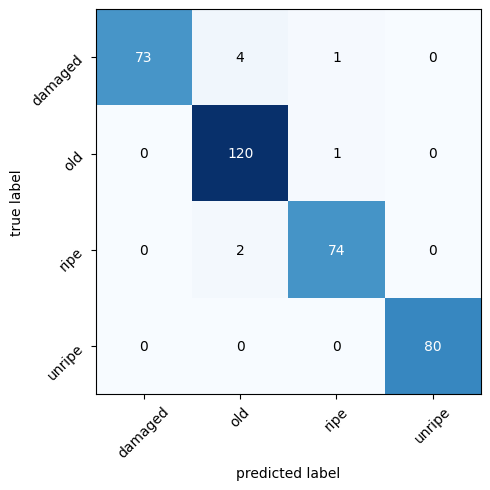

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      0.94      0.97        78
         old       0.95      0.99      0.97       121
        ripe       0.97      0.97      0.97        76
      unripe       1.00      1.00      1.00        80

    accuracy                           0.98       355
   macro avg       0.98      0.98      0.98       355
weighted avg       0.98      0.98      0.98       355

==========================F1 Score====================
F1 Score :  0.9780578866932997


In [9]:
# Confusion Matrix and Classification Report
target_names = ['damaged','old','ripe','unripe']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DenseNet121_Model2.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Tomato_DenseNet2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Tomato_DenseNet2)

# MobileNetV2 1

In [10]:
# load model
MobileNetV2_Model1 = tf.keras.models.load_model('Tomato_MobileNetV2_model')

In [11]:
# evaluate model
print("==========================Evaluate Model====================")
scores_MobileNetV2_Model1 = MobileNetV2_Model1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_MobileNetV2_Model1[1]*100))
print("Loss: %.6f%%" % (scores_MobileNetV2_Model1[0]*100))

==========================Evaluate Model====================
355/355 [==============================] - 5s 10ms/step - loss: 0.1951 - accuracy: 0.9690
Accuracy: 96.901411%
Loss: 19.508788%


==========================Confusion Matrix====================
355/355 [==============================] - 4s 9ms/step


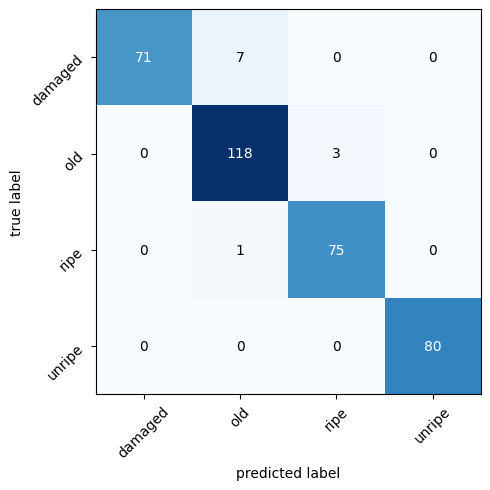

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      0.91      0.95        78
         old       0.94      0.98      0.96       121
        ripe       0.96      0.99      0.97        76
      unripe       1.00      1.00      1.00        80

    accuracy                           0.97       355
   macro avg       0.97      0.97      0.97       355
weighted avg       0.97      0.97      0.97       355

==========================F1 Score====================
F1 Score :  0.9706279238246741


In [12]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = MobileNetV2_Model1.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Tomato_MobileNetV2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Tomato_MobileNetV2)

# MobileNetV2 2

In [13]:
# load model
MobileNetV2_Model2 = tf.keras.models.load_model('Tomato_MobileNetV2_model2')

In [14]:
# evaluate model
print("==========================Evaluate Model====================")
scores_MobileNetV2_Model2 = MobileNetV2_Model2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_MobileNetV2_Model2[1]*100))
print("Loss: %.6f%%" % (scores_MobileNetV2_Model2[0]*100))

==========================Evaluate Model====================
355/355 [==============================] - 4s 10ms/step - loss: 0.1088 - accuracy: 0.9718
Accuracy: 97.183096%
Loss: 10.875061%


==========================Confusion Matrix====================
355/355 [==============================] - 4s 8ms/step


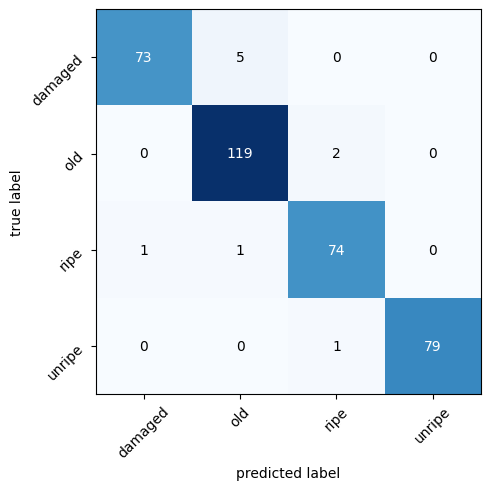

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       0.99      0.94      0.96        78
         old       0.95      0.98      0.97       121
        ripe       0.96      0.97      0.97        76
      unripe       1.00      0.99      0.99        80

    accuracy                           0.97       355
   macro avg       0.97      0.97      0.97       355
weighted avg       0.97      0.97      0.97       355

==========================F1 Score====================
F1 Score :  0.9722592359620075


In [15]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = MobileNetV2_Model2.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Tomato_MobileNetV2_2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Tomato_MobileNetV2_2)

# Xception 1

In [16]:
# load model
Xception_Model1 = tf.keras.models.load_model('Tomato_Xception_model')

In [17]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Model1 = Xception_Model1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Model1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Model1[0]*100))

==========================Evaluate Model====================
355/355 [==============================] - 5s 11ms/step - loss: 0.2087 - accuracy: 0.9718
Accuracy: 97.183096%
Loss: 20.872307%


==========================Confusion Matrix====================
355/355 [==============================] - 4s 9ms/step


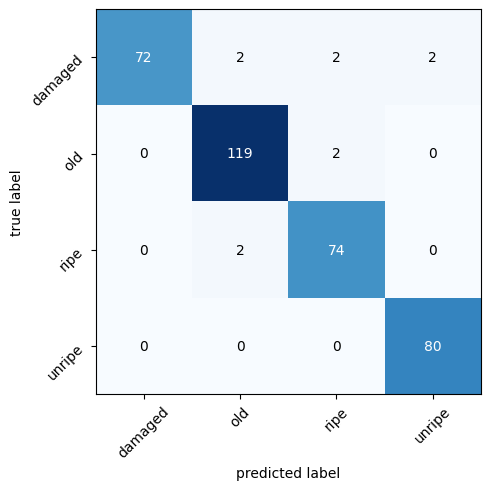

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      0.92      0.96        78
         old       0.97      0.98      0.98       121
        ripe       0.95      0.97      0.96        76
      unripe       0.98      1.00      0.99        80

    accuracy                           0.97       355
   macro avg       0.97      0.97      0.97       355
weighted avg       0.97      0.97      0.97       355

==========================F1 Score====================
F1 Score :  0.9710257795230474


In [18]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Model1.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Tomato_Xception = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Tomato_Xception)

# Xception 2

In [19]:
# load model
Xception_Model2 = tf.keras.models.load_model('Tomato_Xception_model2')

In [20]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Model2 = Xception_Model2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Model2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Model2[0]*100))

==========================Evaluate Model====================
355/355 [==============================] - 5s 12ms/step - loss: 0.1880 - accuracy: 0.9775
Accuracy: 97.746480%
Loss: 18.801774%


==========================Confusion Matrix====================
355/355 [==============================] - 4s 9ms/step


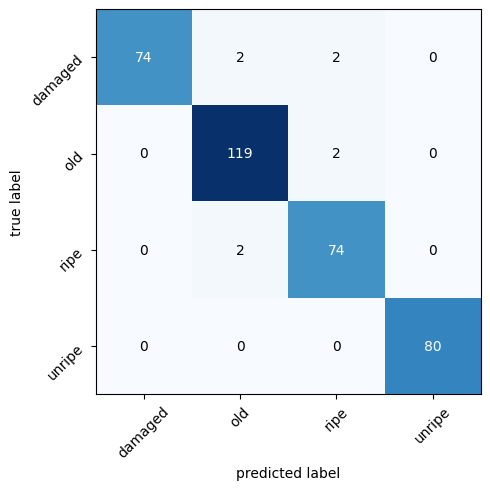

==========================Classification Report====================
Classification Report
              precision    recall  f1-score   support

     damaged       1.00      0.95      0.97        78
         old       0.97      0.98      0.98       121
        ripe       0.95      0.97      0.96        76
      unripe       1.00      1.00      1.00        80

    accuracy                           0.98       355
   macro avg       0.98      0.98      0.98       355
weighted avg       0.98      0.98      0.98       355

==========================F1 Score====================
F1 Score :  0.9775332519077127


In [21]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Model2.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Tomato_Xception2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Tomato_Xception2)

# Comparison

In [22]:
# Make dictionary of all models
models = {
    "DenseNet121_Model1":DenseNet121_Model1,
    "DenseNet121_Model2":DenseNet121_Model2,
    "MobileNetV2_Model1":MobileNetV2_Model1,
    "MobileNetV2_Model2":MobileNetV2_Model2,
    "Xception_Model1":Xception_Model1,
    "Xception_Model2":Xception_Model2
}

# Make dictionary of all accuracy
accuracy = {
    "DenseNet121_Model1":scores_DenseNet121_Model1[1]*100,
    "DenseNet121_Model2":scores_DenseNet121_Model2[1]*100,
    "MobileNetV2_Model1":scores_MobileNetV2_Model1[1]*100,
    "MobileNetV2_Model2":scores_MobileNetV2_Model2[1]*100,
    "Xception_Model1":scores_Xception_Model1[1]*100,
    "Xception_Model2":scores_Xception_Model2[1]*100
}

# Make dictionary of all loss
loss = {
    "DenseNet121_Model1":scores_DenseNet121_Model1[0]*100,
    "DenseNet121_Model2":scores_DenseNet121_Model2[0]*100,
    "MobileNetV2_Model1":scores_MobileNetV2_Model1[0]*100,
    "MobileNetV2_Model2":scores_MobileNetV2_Model2[0]*100,
    "Xception_Model1":scores_Xception_Model1[0]*100,
    "Xception_Model2":scores_Xception_Model2[0]*100
}

# Make dictionary of all F1 Score
f1_score = {
    "DenseNet121_Model1":f1_Tomato_DenseNet1,
    "DenseNet121_Model2":f1_Tomato_DenseNet2,
    "MobileNetV2_Model1":f1_Tomato_MobileNetV2,
    "MobileNetV2_Model2":f1_Tomato_MobileNetV2_2,
    "Xception_Model1":f1_Tomato_Xception,
    "Xception_Model2":f1_Tomato_Xception2
}

# Make dataframe of all models, accuracy and loss
df = pd.DataFrame(list(zip(models.keys(), accuracy.values(), loss.values(), f1_score.values())), columns =['Model', 'Accuracy', 'Loss', 'F1'])

# Sort dataframe by accuracy
df = df.sort_values(by=['Accuracy'], ascending=False)

# Print dataframe
print(df)

                Model   Accuracy       Loss        F1
1  DenseNet121_Model2  97.746480  13.558786  0.978058
5     Xception_Model2  97.746480  18.801774  0.977533
3  MobileNetV2_Model2  97.183096  10.875061  0.972259
4     Xception_Model1  97.183096  20.872307  0.971026
0  DenseNet121_Model1  96.901411  16.311702  0.970004
2  MobileNetV2_Model1  96.901411  19.508788  0.970628


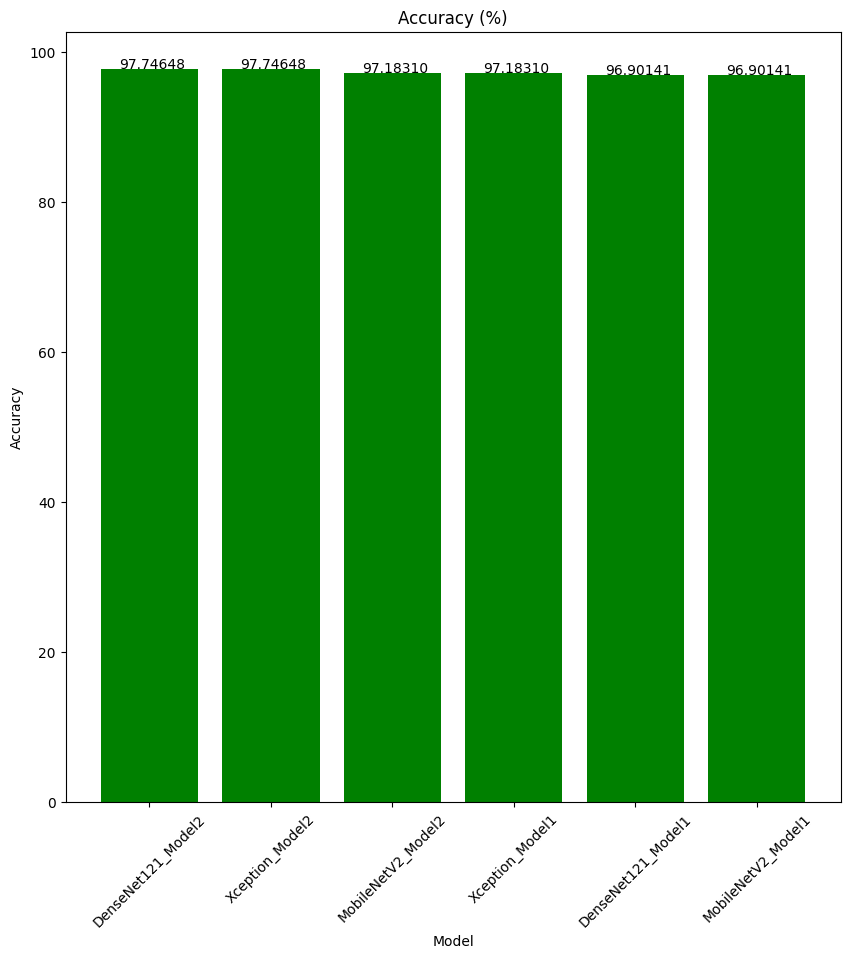

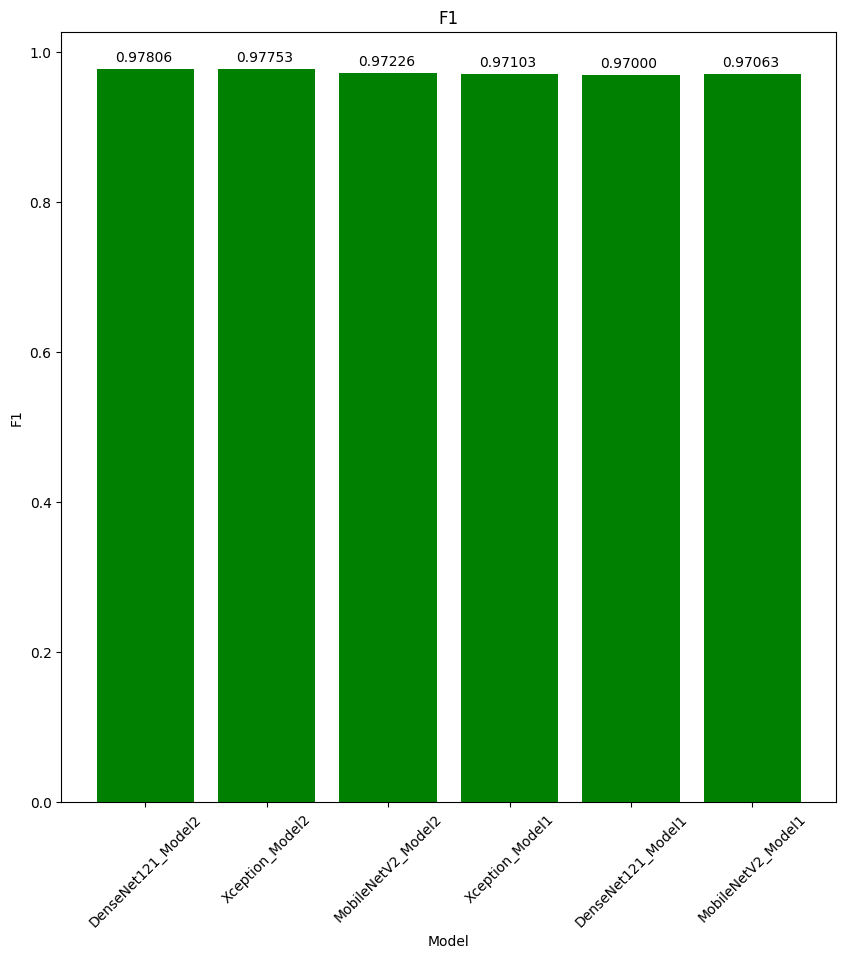

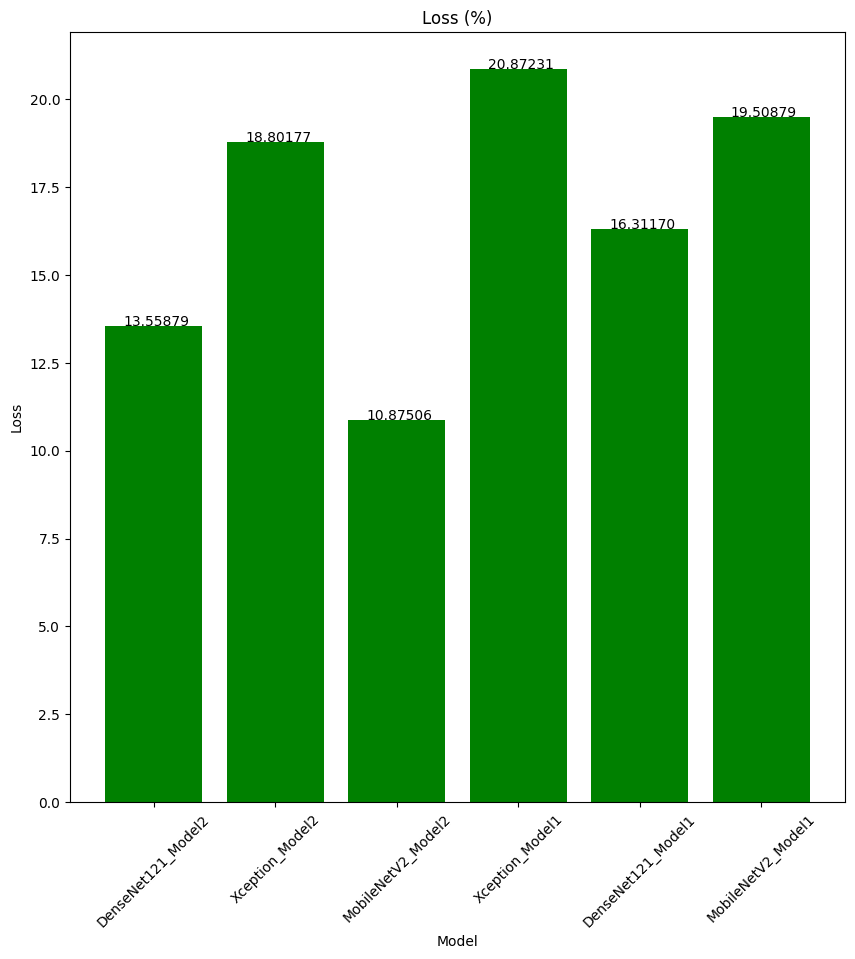

In [23]:
# make multiple plots for accuracy, f1 and loss with annotations
# Accuracy
plt.figure(figsize=(10, 10))
plt.title('Accuracy (%)')
plt.bar(df['Model'], df['Accuracy'], color='green')
plt.xticks(rotation=45)
for i, v in enumerate(df['Accuracy']):
    plt.text(i - 0.25, v + 0.01, '{0:.5f}'.format(v))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# F1
plt.figure(figsize=(10, 10))
plt.title('F1')
plt.bar(df['Model'], df['F1'], color='green')
plt.xticks(rotation=45)
for i, v in enumerate(df['F1']):
    plt.text(i - 0.25, v + 0.01, '{0:.5f}'.format(v))
plt.xlabel('Model')
plt.ylabel('F1')
plt.show()

# Loss
plt.figure(figsize=(10, 10))
plt.title('Loss (%)')
plt.bar(df['Model'], df['Loss'], color='green')
plt.xticks(rotation=45)
for i, v in enumerate(df['Loss']):
    plt.text(i - 0.25, v + 0.0005, '{0:.5f}'.format(v))
plt.xlabel('Model')
plt.ylabel('Loss')
plt.show()